In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/ara_proje_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/benign/aug_0_5669.png  
  inflating: train/benign/aug_0_6396.png  
  inflating: train/benign/aug_0_821.png  
  inflating: train/benign/aug_0_4940.png  
  inflating: train/benign/aug_0_10.png  
  inflating: train/benign/aug_0_9248.png  
  inflating: train/benign/aug_0_6968.png  
  inflating: train/benign/aug_0_6599.png  
  inflating: train/benign/aug_0_6012.png  
  inflating: train/benign/aug_0_2732.png  
  inflating: train/benign/aug_0_6190.png  
  inflating: train/benign/aug_0_824.png  
  inflating: train/benign/aug_0_9575.png  
  inflating: train/benign/aug_0_9135.png  
  inflating: train/benign/aug_0_7581.png  
  inflating: train/benign/aug_0_9464.png  
  inflating: train/benign/aug_0_3309.png  
  inflating: train/benign/aug_0_8782.png  
  inflating: train/benign/aug_0_6508.png  
  inflating: train/benign/aug_0_5852.png  
  inflating: train/benign/aug_0_783.png  
  inflating: train/benign/aug_0_3259.png  
  inflat

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint




# --- 1. YENİ PARAMETRELER ---
DATA_ROOT = "/content/" # Olası kök dizin
IMAGE_SIZE = (224, 224)
NEW_LEARNING_RATE = 0.0001
MAX_EPOCHS = 50
PATIENCE = 10
BATCH_SIZE = 32

# --- 2. CALLBACK'LERİN TANIMLANMASI ---

# 5 epoch boyunca val_loss iyileşmezse eğitimi durdur ve en iyi ağırlıkları geri yükle
early_stopping = EarlyStopping(
monitor='val_loss',
patience=PATIENCE,# Sabır değeri
restore_best_weights=True,# En iyi ağırlıkları yükle
verbose=1
)

# Her epoch sonunda en iyi val_loss değerine sahip ağırlıkları kaydet
checkpoint_filepath = '/tmp/Xception_best_weights_lr0001.weights.h5'
model_checkpoint = ModelCheckpoint(
filepath=checkpoint_filepath,
monitor='val_loss',
save_best_only=True,
verbose=1
)

# --- 3. VERİ YÜKLEYİCİLERİ (DOĞRU NORMALİZASYON) ---
datagen_rescale = ImageDataGenerator(rescale=1./255) # 0-1 Normalizasyonu

train_generator = datagen_rescale.flow_from_directory(
DATA_ROOT + 'train', target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)
valid_generator = datagen_rescale.flow_from_directory(
DATA_ROOT + 'valid', target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# --- 4. MODEL TANIMI (Feature Extraction) ---


base_model = Xception(weights='imagenet',
                      include_top=False,
                      pooling='avg',
                      input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))



base_model.trainable = False

x = base_model.output
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# --- 5. MODELİ DERLEME VE EĞİTİM ---
print(f"Xception modeli LR={NEW_LEARNING_RATE} ile derleniyor...")

model.compile(optimizer=Adam(learning_rate=NEW_LEARNING_RATE),
loss='categorical_crossentropy',
metrics=['accuracy'])

print(f"\n--- ResNet Eğitimi Başlıyor (LR: {NEW_LEARNING_RATE}, Max Epoch: {MAX_EPOCHS}) ---\n")

history = model.fit(
train_generator,
epochs=MAX_EPOCHS,
validation_data=valid_generator,
callbacks=[early_stopping, model_checkpoint] # Callbacks eklendi
)

Found 7031 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Xception modeli LR=0.0001 ile derleniyor...

--- ResNet Eğitimi Başlıyor (LR: 0.0001, Max Epoch: 50) ---



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.4170 - loss: 1.0780
Epoch 1: val_loss improved from inf to 0.89533, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 101s 329ms/step - accuracy: 0.4172 - loss: 1.0778 - val_accuracy: 0.5500 - val_loss: 0.8953
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5419 - loss: 0.9559
Epoch 2: val_loss improved from 0.89533 to 0.82662, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.5420 - loss: 0.9557 - val_accuracy: 0.5750 - val_loss: 0.8266
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6035 - loss: 0.8682
Epoch 3: val_loss improved from 0.82662 to 0.79802, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.6035 - loss: 0.8682 - val_accuracy: 0.6417 - val_loss: 0.7980
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6337 - loss: 0.8308
Epoch 4: val_loss improved from 0.79802 to 0.76735, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.6337 - loss: 0.8307 - val_accuracy: 0.6500 - val_loss: 0.7673
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6532 - loss: 0.7966
Epoch 5: val_loss improved from 0.76735 to 0.74222, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.6532 - loss: 0.7965 - val_accuracy: 0.6750 - val_loss: 0.7422
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6675 - loss: 0.7738
Epoch 6: val_loss did not improve from 0.74222
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.6675 - loss: 0.7738 - val_accuracy: 0.6667 - val_loss: 0.7442
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6838 - loss: 0.7441
Epoch 7: val_loss improved from 0.74222 to 0.71651, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.6838 - loss: 0.7441 - val_accuracy: 0.6667 - val_loss: 0.7165
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6717 - loss: 0.7489
Epoch 8: val_loss did not improve from 0.71651
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.6718 - loss: 0.7488 - val_accuracy: 0.6583 - val_loss: 0.7177
Epoch 9/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7005 - loss: 0.7218
Epoch 9: val_loss improved from 0.71651 to 0.69397, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7005 - loss: 0.7218 - val_accuracy: 0.6750 - val_loss: 0.6940
Epoch 10/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6977 - loss: 0.7173
Epoch 10: val_loss did not improve from 0.69397
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.6977 - loss: 0.7173 - val_accuracy: 0.6583 - val_loss: 0.7034
Epoch 11/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7083 - loss: 0.6954
Epoch 11: val_loss did not improve from 0.69397
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.7083 - loss: 0.6953 - val_accuracy: 0.6500 - val_loss: 0.7014
Epoch 12/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7124 - loss: 0.6950
Epoch 12: val_loss improved from 0.69397 to 0.68071, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.7123 - loss: 0.6949 - val_accuracy: 0.6833 - val_loss: 0.6807
Epoch 13/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7193 - loss: 0.6758
Epoch 13: val_loss improved from 0.68071 to 0.67931, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7193 - loss: 0.6758 - val_accuracy: 0.6833 - val_loss: 0.6793
Epoch 14/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7311 - loss: 0.6707
Epoch 14: val_loss improved from 0.67931 to 0.67466, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7311 - loss: 0.6706 - val_accuracy: 0.6917 - val_loss: 0.6747
Epoch 15/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7300 - loss: 0.6566
Epoch 15: val_loss improved from 0.67466 to 0.66373, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.7300 - loss: 0.6566 - val_accuracy: 0.7000 - val_loss: 0.6637
Epoch 16/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7330 - loss: 0.6559
Epoch 16: val_loss improved from 0.66373 to 0.66004, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7330 - loss: 0.6558 - val_accuracy: 0.7000 - val_loss: 0.6600
Epoch 17/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7378 - loss: 0.6335
Epoch 17: val_loss did not improve from 0.66004
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.7378 - loss: 0.6335 - val_accuracy: 0.6917 - val_loss: 0.6630
Epoch 18/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7425 - loss: 0.6379
Epoch 18: val_loss improved from 0.66004 to 0.65594, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7425 - loss: 0.6379 - val_accuracy: 0.7000 - val_loss: 0.6559
Epoch 19/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7410 - loss: 0.6399
Epoch 19: val_loss improved from 0.65594 to 0.65331, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.7410 - loss: 0.6399 - val_accuracy: 0.7000 - val_loss: 0.6533
Epoch 20/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7490 - loss: 0.6241
Epoch 20: val_loss improved from 0.65331 to 0.65019, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7490 - loss: 0.6241 - val_accuracy: 0.7000 - val_loss: 0.6502
Epoch 21/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7467 - loss: 0.6147
Epoch 21: val_loss improved from 0.65019 to 0.64306, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.7467 - loss: 0.6147 - val_accuracy: 0.7083 - val_loss: 0.6431
Epoch 22/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7421 - loss: 0.6224
Epoch 22: val_loss improved from 0.64306 to 0.64168, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.7421 - loss: 0.6224 - val_accuracy: 0.7167 - val_loss: 0.6417
Epoch 23/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7544 - loss: 0.6172
Epoch 23: val_loss improved from 0.64168 to 0.62815, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.7544 - loss: 0.6172 - val_accuracy: 0.7333 - val_loss: 0.6281
Epoch 24/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7432 - loss: 0.6150
Epoch 24: val_loss did not improve from 0.62815
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.7432 - loss: 0.6150 - val_accuracy: 0.7167 - val_loss: 0.6370
Epoch 25/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7464 - loss: 0.6076
Epoch 25: val_loss did not improve from 0.62815
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.7464 - loss: 0.6076 - val_accuracy: 0.6917 - val_loss: 0.6441
Epoch 26/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7534 - loss: 0.6057
Epoch 26: val_loss did not improve from 0.62815
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.7534 - loss: 0.6057 - val_accuracy: 0.6917 - val_loss: 0.6446
Epoch 27/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7457 - loss: 0.6147
Epoch 27: val_loss improved 

220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.7457 - loss: 0.6147 - val_accuracy: 0.7083 - val_loss: 0.6244
Epoch 28/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7692 - loss: 0.5911
Epoch 28: val_loss did not improve from 0.62445
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7692 - loss: 0.5911 - val_accuracy: 0.7083 - val_loss: 0.6335
Epoch 29/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7775 - loss: 0.5821
Epoch 29: val_loss did not improve from 0.62445
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.7775 - loss: 0.5821 - val_accuracy: 0.7167 - val_loss: 0.6276
Epoch 30/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7643 - loss: 0.5884
Epoch 30: val_loss did not improve from 0.62445
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.7643 - loss: 0.5884 - val_accuracy: 0.7000 - val_loss: 0.6335
Epoch 31/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7583 - loss: 0.5889
Epoch 31: val_loss improved 

220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7584 - loss: 0.5889 - val_accuracy: 0.7167 - val_loss: 0.6217
Epoch 32/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7670 - loss: 0.5906
Epoch 32: val_loss improved from 0.62171 to 0.62022, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.7670 - loss: 0.5905 - val_accuracy: 0.7167 - val_loss: 0.6202
Epoch 33/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7709 - loss: 0.5639
Epoch 33: val_loss improved from 0.62022 to 0.60877, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.7708 - loss: 0.5639 - val_accuracy: 0.7500 - val_loss: 0.6088
Epoch 34/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7652 - loss: 0.5787
Epoch 34: val_loss did not improve from 0.60877
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7652 - loss: 0.5787 - val_accuracy: 0.7083 - val_loss: 0.6217
Epoch 35/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7790 - loss: 0.5606
Epoch 35: val_loss did not improve from 0.60877
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.7790 - loss: 0.5606 - val_accuracy: 0.7333 - val_loss: 0.6140
Epoch 36/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7785 - loss: 0.5592
Epoch 36: val_loss did not improve from 0.60877
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.7784 - loss: 0.5593 - val_accuracy: 0.7083 - val_loss: 0.6262
Epoch 37/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7751 - loss: 0.5784
Epoch 37: val_loss did not i

220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.7787 - loss: 0.5548 - val_accuracy: 0.7417 - val_loss: 0.6071
Epoch 42/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7867 - loss: 0.5440
Epoch 42: val_loss improved from 0.60713 to 0.60694, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7867 - loss: 0.5440 - val_accuracy: 0.7333 - val_loss: 0.6069
Epoch 43/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7791 - loss: 0.5612
Epoch 43: val_loss did not improve from 0.60694
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.7791 - loss: 0.5612 - val_accuracy: 0.7333 - val_loss: 0.6106
Epoch 44/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7705 - loss: 0.5641
Epoch 44: val_loss improved from 0.60694 to 0.60259, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7705 - loss: 0.5641 - val_accuracy: 0.7333 - val_loss: 0.6026
Epoch 45/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7709 - loss: 0.5505
Epoch 45: val_loss did not improve from 0.60259
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.7709 - loss: 0.5505 - val_accuracy: 0.7333 - val_loss: 0.6096
Epoch 46/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7710 - loss: 0.5591
Epoch 46: val_loss did not improve from 0.60259
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.7710 - loss: 0.5591 - val_accuracy: 0.7167 - val_loss: 0.6124
Epoch 47/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7739 - loss: 0.5589
Epoch 47: val_loss did not improve from 0.60259
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.7739 - loss: 0.5589 - val_accuracy: 0.7333 - val_loss: 0.6098
Epoch 48/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7872 - loss: 0.5401
Epoch 48: val_loss improved 

220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.7871 - loss: 0.5402 - val_accuracy: 0.7250 - val_loss: 0.5995
Epoch 49/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7776 - loss: 0.5527
Epoch 49: val_loss did not improve from 0.59954
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.7776 - loss: 0.5526 - val_accuracy: 0.7333 - val_loss: 0.6079
Epoch 50/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7735 - loss: 0.5518
Epoch 50: val_loss did not improve from 0.59954
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.7735 - loss: 0.5518 - val_accuracy: 0.7333 - val_loss: 0.6044
Restoring model weights from the end of the best epoch: 48.


In [4]:
# Eğitimin temel metriklerini yazdıralım
print("\n--- EĞİTİM VE VALIDASYON ÖZETİ (HISTORY) ---")

# En iyi Validasyon Accuracy'i bulma
best_val_acc = max(history.history['val_accuracy'])
print(f"En Yüksek Validasyon Accuracy: {best_val_acc:.4f}")

# Sonuçları Training Seti üzerinde değerlendirelim
# Training Seti performansı (genellikle çok yüksektir)
train_results = model.evaluate(train_generator, verbose=0)
print(f"Training Seti Accuracy: {train_results[1]:.4f}")
print(f"Training Seti Loss: {train_results[0]:.4f}")


--- EĞİTİM VE VALIDASYON ÖZETİ (HISTORY) ---
En Yüksek Validasyon Accuracy: 0.7500
Training Seti Accuracy: 0.8271
Training Seti Loss: 0.4912


Found 115 images belonging to 3 classes.

--- Xception (Makale Ayarları) TEST SETİ Metrikleri Hesaplanıyor ---



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 8s/step
Test Accuracy: 0.7739
Test Recall (Duyarlılık): 0.7889
Test Precision (Kesinlik): 0.7463
Test F1-Score: 0.7581


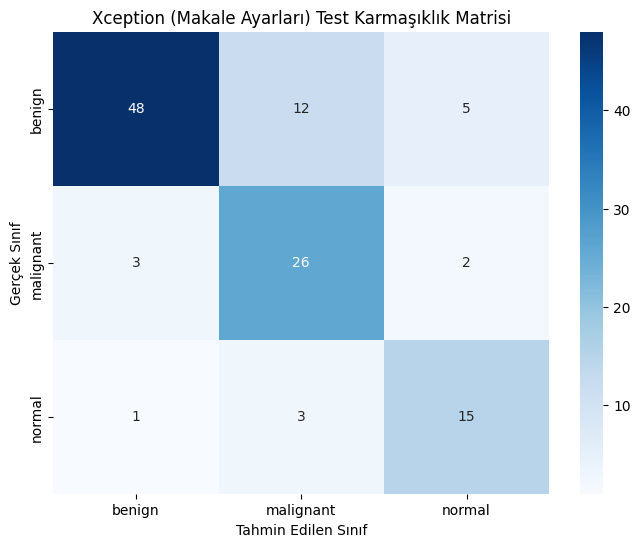


--- Tabloya Eklenecek Sonuçlar ---

Xception (Makale Ayarları) | Accuracy: 0.7739 | Recall: 0.7889 | Precision: 0.7463 | F1-Score: 0.7581

Karmaşıklık Matrisi (Xception_makale_confusion_matrix.png) oluşturuldu.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- 1. TEST VERİ YÜKLEYİCİSİ (Normalizasyon: 0-1) ---
# Makale ayarlarına uygun olarak 0-1 normalizasyonunu kullanmalıyız.
datagen_test = ImageDataGenerator(rescale=1./255)

# Test generator'ı oluştur. Shuffle=False kritik!
test_generator = datagen_test.flow_from_directory(
    DATA_ROOT + 'test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False # Sınıfları doğru eşleştirmek için KARŞTIRMA KAPALI olmalı
)

# --- 2. TAHMİN VE METRİK HESAPLAMA ---

print("\n--- Xception (Makale Ayarları) TEST SETİ Metrikleri Hesaplanıyor ---\n")

test_steps = int(np.ceil(test_generator.samples / BATCH_SIZE))
y_pred_proba_test = model.predict(test_generator, steps=test_steps)
y_pred_test = y_pred_proba_test.argmax(axis=1) # Olasılıklardan en yüksek olanın indeksini al
y_true_test = test_generator.classes # Gerçek etiketleri al

# Sınıf isimlerini al (Örn: benign, malignant, normal)
class_labels = list(test_generator.class_indices.keys())

# Metrikler
accuracy_test = accuracy_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test, average='macro', zero_division=0)
precision_test = precision_score(y_true_test, y_pred_test, average='macro', zero_division=0)
f1_test = f1_score(y_true_test, y_pred_test, average='macro', zero_division=0)

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Recall (Duyarlılık): {recall_test:.4f}")
print(f"Test Precision (Kesinlik): {precision_test:.4f}")
print(f"Test F1-Score: {f1_test:.4f}")

# --- 3. KARMAŞIKLIK MATRİSİ (CONFUSION MATRIX) OLUŞTURMA ---

cm = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=class_labels,
             yticklabels=class_labels)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Xception (Makale Ayarları) Test Karmaşıklık Matrisi')
plt.savefig('resnet_makale_confusion_matrix.png')
plt.show()

print("\n--- Tabloya Eklenecek Sonuçlar ---\n")
print(f"Xception (Makale Ayarları) | Accuracy: {accuracy_test:.4f} | Recall: {recall_test:.4f} | Precision: {precision_test:.4f} | F1-Score: {f1_test:.4f}")
print("\nKarmaşıklık Matrisi (Xception_makale_confusion_matrix.png) oluşturuldu.")